# CNN Trainig Templete
## Based on Tensorlfow - CNN MNIST example
https://github.com/tensorflow/tensorflow/blob/r1.6/tensorflow/examples/tutorials/layers/cnn_mnist.py

## 필요한 library 호출

In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
import tensorflow as tf

import cv2

import os

tf.logging.set_verbosity(tf.logging.INFO)


/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## CNN model 설계
현재는 MNIST에 사용된 것으로, 추후 그물 찢김에 적용하기 위해 수정 필요

### Input Layer
Input Image Pixel: 28x28  
Color channel: 1 (grayscale)  

### 1st Conv Layer
Num of filter: 32  
Kernel size: 5x5  
Padding: Same  
Activation: ReLU  
Padding same은 입/출력이 같은 크기를 갖도록 padding하는 것  

### 1st Pooling Layer
Max pooling  
Size: 2x2  
Stride: 2  
Max pooling 시 size의 폭과 stride가 같으면 pooling window가 서로 겹치지 않음  

### 2nd Conv Layer
Num of filter: 64  
Kernel size: 5x5  
Padding: Same  
Activation: ReLU  

### 2nd Pooling Layer
Max pooling  
Size: 2x2  
Stride: 2  


### 3rd, 4th, 5th


### Dense Layer
Fully connected  

### Drop out
Rate: 0.4 (40%)  
훈련 중 40%의 connection이 임의로 제거됨  
Overfitting 방지  
뇌의학에서도 학습을 반복할수록 사람 뇌의 뉴런은 일부 connection이 끊어지면서 더 확실하게 학습한다고 함  

### Logits Layer
Binaray classification  

### Training
Loss function: Softmax Cross Entropy  
Optimizer: Gradient Descent  
Learning rate: 0.001  

In [2]:
def cnn_model_fn(features, labels, mode):
    
    """Model function for CNN."""
    # Input Layer
    # Reshape X to 4-D tensor: [batch_size, height, width, channels]
    # Our Fishing net image size is 640x480 and 3-channel (RGB)
    input_layer = tf.reshape(features["x"], [-1, 480, 640, 3])

    # Convolutional Layer #1
    # Computes 48 features using a 5x5 filter with ReLU activation.
    # Padding is added to preserve width and height.
    # Input Tensor Shape: [batch_size, 480, 640, 3]
    # Output Tensor Shape: [batch_size, 480, 640, 48]
    conv1 = tf.layers.conv2d(
        
        inputs=input_layer,
        filters=48,
        kernel_size=[5, 5],
        padding="same",
        activation=tf.nn.relu)
    print(conv1.shape)

    # Pooling Layer #1
    # First max pooling layer with a 2x2 filter and stride of 2
    # Input Tensor Shape: [batch_size, 480, 640, 48]
    # Output Tensor Shape: [batch_size, 240, 320, 48]
    pool1 = tf.layers.max_pooling2d(inputs=conv1, pool_size=[2, 2], strides=2)
    print(pool1.shape)

    # Convolutional Layer #2
    # Computes 96 features using a 5x5 filter.
    # Padding is added to preserve width and height.
    # Input Tensor Shape: [batch_size, 240, 320, 48]
    # Output Tensor Shape: [batch_size, 240, 320, 96]
    conv2 = tf.layers.conv2d(
        inputs=pool1,
        filters=96,
        kernel_size=[5, 5],
        padding="same",
        activation=tf.nn.relu)
    print(conv2.shape)

    # Pooling Layer #2
    # Second max pooling layer with a 2x2 filter and stride of 2
    # Input Tensor Shape: [batch_size, 240, 320, 96]
    # Output Tensor Shape: [batch_size, 120, 160, 96]
    pool2 = tf.layers.max_pooling2d(inputs=conv2, pool_size=[2, 2], strides=2)
    print(pool2.shape)

    
    
    
    # Input Tensor Shape: [batch_size, 120, 160, 96]
    # Output Tensor Shape: [batch_size, 120, 160, 96]    
    conv3 = tf.layers.conv2d(
        inputs=pool2,
        filters=96,
        kernel_size=[5, 5],
        padding="same",
        activation=tf.nn.relu)
    print(conv3.shape)
    
    # Input Tensor Shape: [batch_size, 120, 160, 96]
    # Output Tensor Shape: [batch_size, 60, 80, 96]
    pool3 = tf.layers.max_pooling2d(inputs=conv3, pool_size=[2, 2], strides=2)
    print(pool3.shape)
    
    
    
    # Input Tensor Shape: [batch_size, 60, 80, 96]
    # Output Tensor Shape: [batch_size, 60, 80, 96]    
    conv4 = tf.layers.conv2d(
        inputs=pool3,
        filters=96,
        kernel_size=[5, 5],
        padding="same",
        activation=tf.nn.relu)
    print(conv4.shape)
    
    # Input Tensor Shape: [batch_size, 60, 80, 96]
    # Output Tensor Shape: [batch_size, 30, 40, 96]
    pool4 = tf.layers.max_pooling2d(inputs=conv4, pool_size=[2, 2], strides=2)
    print(pool4.shape)
    
    
    
    # Input Tensor Shape: [batch_size, 30, 40, 96]
    # Output Tensor Shape: [batch_size, 30, 40, 96]    
    conv5 = tf.layers.conv2d(
        inputs=pool4,
        filters=96,
        kernel_size=[5, 5],
        padding="same",
        activation=tf.nn.relu)
    print(conv5.shape)
    
    # Input Tensor Shape: [batch_size, 30, 40, 96]
    # Output Tensor Shape: [batch_size, 15, 20, 96]
    pool5 = tf.layers.max_pooling2d(inputs=conv5, pool_size=[2, 2], strides=2)
    print(pool5.shape)
    
    
    
    
    # Flatten tensor into a batch of vectors
    # Input Tensor Shape: [batch_size, 15, 20, 96]
    # Output Tensor Shape: [batch_size, 15 * 20 * 96]
    pool5_flat = tf.reshape(pool5, [-1, 15 * 20 * 96])
    print(pool5_flat.shape)


    # Dense Layer
    # Densely connected layer with 1024 neurons
    # Input Tensor Shape: [batch_size, 15 * 20 * 96]
    # Output Tensor Shape: [batch_size, 1024]
    dense = tf.layers.dense(inputs=pool5_flat, units=1024, activation=tf.nn.relu)
    print(dense.shape)

    # Add dropout operation; 0.6 probability that element will be kept
    dropout = tf.layers.dropout(
        inputs=dense, rate=0.4, training=mode == tf.estimator.ModeKeys.TRAIN)

    # Logits layer
    # Input Tensor Shape: [batch_size, 1024]
    # Output Tensor Shape: [batch_size, 1]
    logits = tf.layers.dense(inputs=dropout, units=2)
    print(logits.shape)

    predictions = {
        # Generate predictions (for PREDICT and EVAL mode)
        "classes": tf.argmax(input=logits, axis=1),
        # Add `softmax_tensor` to the graph. It is used for PREDICT and by the
        # `logging_hook`.
        "probabilities": tf.nn.softmax(logits, name="softmax_tensor")
    }
    if mode == tf.estimator.ModeKeys.PREDICT:
        return tf.estimator.EstimatorSpec(mode=mode, predictions=predictions)

    # Calculate Loss (for both TRAIN and EVAL modes)
    loss = tf.losses.sparse_softmax_cross_entropy(labels=labels, logits=logits)
    # sparse_softmax_cross_entropy cannot use one-hot encoding
    
    #loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=labels, logits=logits)

    # Configure the Training Op (for TRAIN mode)
    if mode == tf.estimator.ModeKeys.TRAIN:
        optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
        train_op = optimizer.minimize(
            loss=loss,
            global_step=tf.train.get_global_step())
        return tf.estimator.EstimatorSpec(mode=mode, loss=loss, train_op=train_op)

    # Add evaluation metrics (for EVAL mode)
    eval_metric_ops = {
        "accuracy": tf.metrics.accuracy(
            labels=labels, predictions=predictions["classes"])}
    return tf.estimator.EstimatorSpec(
        mode=mode, loss=loss, eval_metric_ops=eval_metric_ops)

## Code Run


### Training
Batch size: 128  
Epoch: 5  
Shuffle: True  
Step: 20000

## Loading dataset
Load dataset and split them into training data and evaluation data

In [3]:
# torn: 0-1484
# untorn: 0-1779
num_torn = 1485
num_untorn = 1780
total_pix = 480*640*3

torn_data = np.zeros((num_torn, total_pix), dtype=np.float32)
print(torn_data.shape)
untorn_data = np.zeros((num_untorn, total_pix), dtype=np.float32)

(1485, 921600)


In [4]:
torn_idx = np.arange(num_torn)
untorn_idx = np.arange(num_untorn)
print(torn_idx)

np.random.shuffle(torn_idx)
np.random.shuffle(untorn_idx)

print(torn_idx)

[   0    1    2 ... 1482 1483 1484]
[  76  821  259 ...  629 1280  302]


In [5]:
for i in range(num_torn):
    img = cv2.imread("/dataset/torn/img-%04d.png" % torn_idx[i]).flatten()
    torn_data[i][:] = img

In [6]:
for i in range(num_untorn):
    img = cv2.imread("/dataset/untorn/img-%04d.png" % untorn_idx[i]).flatten()
    untorn_data[i][:] = img

In [7]:
torn_label = np.full((num_torn,1), 1, dtype=np.float32)
untorn_label = np.full((num_untorn,1), 1, dtype=np.float32)

In [8]:
# 80% training, 20% evaluation
tr_rate = 0.8
num_tr_torn = int(tr_rate * num_torn)
num_ev_torn = num_torn - num_tr_torn
print(num_tr_torn, num_ev_torn)

num_tr_untorn = int(tr_rate * num_untorn)
num_ev_untorn = num_untorn - num_tr_untorn
print(num_tr_untorn, num_ev_untorn)

tr_torn = torn_data[:num_tr_torn][:]
ev_torn = torn_data[num_tr_torn:][:]
print(tr_torn.shape)
print(ev_torn.shape)

tr_untorn = untorn_data[:num_tr_untorn][:]
ev_untorn = untorn_data[num_tr_untorn:][:]
print(tr_untorn.shape)
print(ev_untorn.shape)



tr_data = np.append(tr_torn, tr_untorn, axis=0)
print(tr_data.shape)
ev_data = np.append(ev_torn, ev_untorn, axis=0)
print(ev_data.shape)

tr_label = np.append(np.full((num_tr_torn), 1, dtype=np.int32), np.full((num_tr_untorn), 0, dtype=np.int32))
ev_label = np.append(np.full((num_ev_torn), 1, dtype=np.int32), np.full((num_ev_untorn), 0, dtype=np.int32))
print(tr_label.shape[0], ev_label.shape[0])



1188 297
1424 356
(1188, 921600)
(297, 921600)
(1424, 921600)
(356, 921600)
(2612, 921600)
(653, 921600)
2612 653


In [9]:
shuf1 = np.arange(tr_label.shape[0])
np.random.shuffle(shuf1)
print(shuf1)

shuf2 = np.arange(ev_label.shape[0])
np.random.shuffle(shuf2)
print(shuf2)

tr_data_sh = np.zeros((tr_data.shape), dtype=np.float32)
tr_label_sh = np.zeros((tr_label.shape), dtype=np.int32)
ev_data_sh = np.zeros((ev_data.shape), dtype=np.float32)
ev_label_sh = np.zeros((ev_label.shape), dtype=np.int32)


for i in range(tr_label.shape[0]):
    tr_data_sh[i][:] = tr_data[shuf1[i]][:]
    tr_label_sh[i] = tr_label[shuf1[i]]
    
for i in range (ev_label.shape[0]):
    ev_data_sh[i][:] = ev_data[shuf2[i]][:]
    ev_label_sh[i] = ev_label[shuf2[i]]

[ 722  302  727 ... 1799  152  390]
[183 632 241 231 136 230  88 364 382 222  46 141   1 170 266 369 152 479
 510 545 296 317 618 208  67 248 397 348 326 164 262  10 242  72 600 276
 557  73 498 187 206 244  45 357 284 223 277 501 523 548  26 588 194 580
 627  33 264 389  94 489 408 413  83  27 474 359 453 558 431  93 630 589
 438 515 398 480 119 505  28 240 599 604 419 192 528 526 500 531 473 133
 243 404 143 228 179 209   5 602 410 190 454 376 107 423 551 605 290 571
 412  85 153  66 380 203 308  17 387 460 374 393 608 144 148 128 597 363
  75 430 155 218 402 637 247 549  95 584 124 639 536 440 375 385  48 195
 121 461 425  81 129 351 335  74 281 336 219 293 381 555 306 514 354 373
 256 371 131 409 255  29 321 433 322 224  41 115 513 436 260 420  11  31
  84 559 299 642 263  50 472 626 564  18 622 191 342 312 205 215  57 492
 572 586 463 631 615 189 560 319 446 574 172 309 628   2  71 307 629  97
 403  25 279 603 303 105 416 350 447 135  24 532 638  98 361 640 582 347
  44 274 406 26

In [13]:
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.7
session = tf.Session(config=config)

# Create the Estimator
net_classifier = tf.estimator.Estimator(
    model_fn=cnn_model_fn, model_dir="/models/CNN2600-0423")

# Set up logging for predictions
# Log the values in the "Softmax" tensor with label "probabilities"
tensors_to_log = {"probabilities": "softmax_tensor"}
logging_hook = tf.train.LoggingTensorHook(
    tensors=tensors_to_log, every_n_iter=50)

batch_s = 16
epochs = 5
tr_steps = int(tr_data.shape[0]/batch_s*epochs)
in_steps = 1

for d in ['/device:GPU:0', '/device:GPU:1', '/device:GPU:2']:
    with tf.device(d):

        # Train the model
        train_input_fn = tf.estimator.inputs.numpy_input_fn(
            x={"x": tr_data},
            y=tr_label,
            batch_size=batch_s,
            num_epochs=epochs,
            shuffle=True)
        net_classifier.train(
            input_fn=train_input_fn,
            steps=20000,
            hooks=[logging_hook])

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_log_step_count_steps': 100, '_evaluation_master': '', '_keep_checkpoint_every_n_hours': 10000, '_master': '', '_num_ps_replicas': 0, '_keep_checkpoint_max': 5, '_save_checkpoints_secs': 600, '_num_worker_replicas': 1, '_session_config': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7ef9bc6444a8>, '_task_type': 'worker', '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_model_dir': '/models/CNN2600-0423', '_service': None, '_global_id_in_cluster': 0, '_tf_random_seed': None, '_is_chief': True, '_task_id': 0}
INFO:tensorflow:Calling model_fn.
(?, 480, 640, 48)
(?, 240, 320, 48)
(?, 240, 320, 96)
(?, 120, 160, 96)
(?, 120, 160, 96)
(?, 60, 80, 96)
(?, 60, 80, 96)
(?, 30, 40, 96)
(?, 30, 40, 96)
(?, 15, 20, 96)
(?, 28800)
(?, 1024)
(?, 2)
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensor

INFO:tensorflow:step = 3149, loss = 0.25084502 (28.578 sec)
INFO:tensorflow:probabilities = [[0.00000371 0.9999963 ]
 [0.98644096 0.01355909]
 [0.00075099 0.9992489 ]
 [0.00001112 0.9999889 ]
 [0.42192605 0.578074  ]
 [0.9811778  0.01882221]
 [0.36129043 0.63870955]
 [0.9969246  0.00307541]
 [0.99877816 0.00122187]
 [0.22663896 0.7733611 ]
 [0.00129541 0.99870455]
 [0.9586405  0.04135951]
 [0.00015854 0.99984145]
 [0.40706322 0.59293675]
 [0.31782523 0.68217474]
 [0.3194007  0.68059933]] (14.312 sec)
INFO:tensorflow:global_step/sec: 3.52923
INFO:tensorflow:probabilities = [[0.30768195 0.6923181 ]
 [0.00000009 0.9999999 ]
 [0.00009888 0.99990106]
 [0.00003889 0.99996114]
 [0.00001058 0.9999894 ]
 [0.99971694 0.00028309]
 [0.9367035  0.0632965 ]
 [0.49590242 0.5040976 ]
 [0.7392289  0.26077104]
 [0.00000122 0.9999988 ]
 [0.00000276 0.99999726]
 [0.99755186 0.00244814]
 [0.99520725 0.00479272]
 [0.06746136 0.93253857]
 [0.23822112 0.76177883]
 [0.30956087 0.6904391 ]] (14.023 sec)
INFO:te

INFO:tensorflow:probabilities = [[0.9999945  0.00000552]
 [0.28216907 0.7178309 ]
 [0.7629107  0.23708923]
 [0.5258674  0.4741326 ]
 [0.52103144 0.47896853]
 [0.74852526 0.25147474]
 [0.9998816  0.00011842]
 [0.99930215 0.00069789]
 [0.17824729 0.8217527 ]
 [0.999858   0.00014202]
 [0.73305017 0.2669499 ]
 [0.9996543  0.00034572]
 [0.8179696  0.1820304 ]
 [0.00000081 0.99999917]
 [0.00245528 0.9975447 ]
 [0.00793733 0.9920626 ]] (14.264 sec)
INFO:tensorflow:global_step/sec: 3.49874
INFO:tensorflow:probabilities = [[0.07963978 0.92036015]
 [0.00004253 0.99995744]
 [0.7677983  0.2322017 ]
 [0.06933166 0.93066835]
 [0.86012906 0.13987097]
 [0.00000171 0.99999833]
 [0.00000043 0.9999995 ]
 [0.01665603 0.983344  ]
 [0.18374066 0.8162594 ]
 [0.0008193  0.99918073]
 [0.12429097 0.87570906]
 [0.00034381 0.9996562 ]
 [0.0058554  0.9941446 ]
 [0.2823405  0.7176595 ]
 [0.5871389  0.4128611 ]
 [0.07263944 0.9273606 ]] (14.318 sec)
INFO:tensorflow:step = 3966, loss = 0.27599165 (28.581 sec)
INFO:te

INFO:tensorflow:global_step/sec: 3.49036
INFO:tensorflow:probabilities = [[0.00135038 0.99864966]
 [0.00000181 0.9999982 ]
 [0.99981564 0.00018441]
 [0.9999999  0.00000013]
 [0.01152748 0.9884725 ]
 [0.8125262  0.18747377]
 [0.00000022 0.99999976]
 [0.00003097 0.999969  ]
 [0.9998369  0.00016304]
 [0.36672857 0.6332714 ]
 [0.97074103 0.02925901]
 [0.00003604 0.999964  ]
 [0.9999981  0.00000189]
 [0.00501198 0.9949881 ]
 [0.06459913 0.9354009 ]
 [0.9844856  0.01551438]] (14.224 sec)
INFO:tensorflow:step = 4683, loss = 0.04968523 (28.651 sec)
INFO:tensorflow:probabilities = [[0.9999747  0.00002527]
 [0.00158533 0.99841464]
 [0.9999759  0.00002412]
 [0.09957362 0.9004264 ]
 [0.99915385 0.00084619]
 [0.01488683 0.98511314]
 [0.01184016 0.9881598 ]
 [0.17312407 0.8268759 ]
 [0.50600594 0.4939941 ]
 [0.9642096  0.03579044]
 [0.00057952 0.9994205 ]
 [0.9999894  0.00001064]
 [0.03388507 0.96611494]
 [0.9999503  0.00004972]
 [0.02591293 0.97408706]
 [0.18050362 0.81949645]] (14.236 sec)
INFO:te

In [14]:
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.8
session = tf.Session(config=config)

ev_results = np.zeros((len(ev_label), 1))
with tf.device('/device:GPU:3'):

    # Evaluate the model and print results
    for i in range(len(ev_label)):
        eval_input_fn = tf.estimator.inputs.numpy_input_fn(
            x={"x": ev_data_sh[i:i+1]},
            y=ev_label_sh[i:i+1],
            num_epochs=1,
            shuffle=False)
        eval_results = net_classifier.evaluate(input_fn=eval_input_fn)
        
        ev_results[i] = eval_results["accuracy"]

INFO:tensorflow:Calling model_fn.
(?, 480, 640, 48)
(?, 240, 320, 48)
(?, 240, 320, 96)
(?, 120, 160, 96)
(?, 120, 160, 96)
(?, 60, 80, 96)
(?, 60, 80, 96)
(?, 30, 40, 96)
(?, 30, 40, 96)
(?, 15, 20, 96)
(?, 28800)
(?, 1024)
(?, 2)
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-04-23-02:25:56
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/CNN2600-0423/model.ckpt-4899
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-04-23-02:25:56
INFO:tensorflow:Saving dict for global step 4899: accuracy = 1.0, global_step = 4899, loss = 0.008658013
INFO:tensorflow:Calling model_fn.
(?, 480, 640, 48)
(?, 240, 320, 48)
(?, 240, 320, 96)
(?, 120, 160, 96)
(?, 120, 160, 96)
(?, 60, 80, 96)
(?, 60, 80, 96)
(?, 30, 40, 96)
(?, 30, 40, 96)
(?, 15, 20, 96)
(?, 28800)
(?, 1024)
(?, 2)
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation 

INFO:tensorflow:Saving dict for global step 4899: accuracy = 1.0, global_step = 4899, loss = 0.013288858
INFO:tensorflow:Calling model_fn.
(?, 480, 640, 48)
(?, 240, 320, 48)
(?, 240, 320, 96)
(?, 120, 160, 96)
(?, 120, 160, 96)
(?, 60, 80, 96)
(?, 60, 80, 96)
(?, 30, 40, 96)
(?, 30, 40, 96)
(?, 15, 20, 96)
(?, 28800)
(?, 1024)
(?, 2)
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-04-23-02:26:01
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/CNN2600-0423/model.ckpt-4899
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-04-23-02:26:01
INFO:tensorflow:Saving dict for global step 4899: accuracy = 1.0, global_step = 4899, loss = 0.0
INFO:tensorflow:Calling model_fn.
(?, 480, 640, 48)
(?, 240, 320, 48)
(?, 240, 320, 96)
(?, 120, 160, 96)
(?, 120, 160, 96)
(?, 60, 80, 96)
(?, 60, 80, 96)
(?, 30, 40, 96)
(?, 30, 40, 96)
(?, 15, 20, 96)
(?, 28

INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-04-23-02:26:06
INFO:tensorflow:Saving dict for global step 4899: accuracy = 1.0, global_step = 4899, loss = 7.867782e-06
INFO:tensorflow:Calling model_fn.
(?, 480, 640, 48)
(?, 240, 320, 48)
(?, 240, 320, 96)
(?, 120, 160, 96)
(?, 120, 160, 96)
(?, 60, 80, 96)
(?, 60, 80, 96)
(?, 30, 40, 96)
(?, 30, 40, 96)
(?, 15, 20, 96)
(?, 28800)
(?, 1024)
(?, 2)
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-04-23-02:26:06
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/CNN2600-0423/model.ckpt-4899
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-04-23-02:26:06
INFO:tensorflow:Saving dict for global step 4899: accuracy = 1.0, global_step = 4899, loss = 0.094955005
INFO:tensorflow:Calling model_fn.
(?, 480, 640, 48)
(?, 240, 320, 48)
(?, 240, 320, 96)
(?, 120, 1

INFO:tensorflow:Restoring parameters from /models/CNN2600-0423/model.ckpt-4899
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-04-23-02:26:11
INFO:tensorflow:Saving dict for global step 4899: accuracy = 1.0, global_step = 4899, loss = 0.0003933133
INFO:tensorflow:Calling model_fn.
(?, 480, 640, 48)
(?, 240, 320, 48)
(?, 240, 320, 96)
(?, 120, 160, 96)
(?, 120, 160, 96)
(?, 60, 80, 96)
(?, 60, 80, 96)
(?, 30, 40, 96)
(?, 30, 40, 96)
(?, 15, 20, 96)
(?, 28800)
(?, 1024)
(?, 2)
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-04-23-02:26:11
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/CNN2600-0423/model.ckpt-4899
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-04-23-02:26:11
INFO:tensorflow:Saving dict for global step 4899: accuracy = 1.0, global_step = 4899,

INFO:tensorflow:Starting evaluation at 2018-04-23-02:26:16
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/CNN2600-0423/model.ckpt-4899
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-04-23-02:26:16
INFO:tensorflow:Saving dict for global step 4899: accuracy = 1.0, global_step = 4899, loss = 0.00029285433
INFO:tensorflow:Calling model_fn.
(?, 480, 640, 48)
(?, 240, 320, 48)
(?, 240, 320, 96)
(?, 120, 160, 96)
(?, 120, 160, 96)
(?, 60, 80, 96)
(?, 60, 80, 96)
(?, 30, 40, 96)
(?, 30, 40, 96)
(?, 15, 20, 96)
(?, 28800)
(?, 1024)
(?, 2)
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-04-23-02:26:16
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/CNN2600-0423/model.ckpt-4899
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-04-

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-04-23-02:26:21
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/CNN2600-0423/model.ckpt-4899
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-04-23-02:26:21
INFO:tensorflow:Saving dict for global step 4899: accuracy = 1.0, global_step = 4899, loss = 0.0070454255
INFO:tensorflow:Calling model_fn.
(?, 480, 640, 48)
(?, 240, 320, 48)
(?, 240, 320, 96)
(?, 120, 160, 96)
(?, 120, 160, 96)
(?, 60, 80, 96)
(?, 60, 80, 96)
(?, 30, 40, 96)
(?, 30, 40, 96)
(?, 15, 20, 96)
(?, 28800)
(?, 1024)
(?, 2)
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-04-23-02:26:21
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/CNN2600-0423/model.ckpt-4899
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tens

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-04-23-02:26:26
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/CNN2600-0423/model.ckpt-4899
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-04-23-02:26:26
INFO:tensorflow:Saving dict for global step 4899: accuracy = 1.0, global_step = 4899, loss = 0.09604773
INFO:tensorflow:Calling model_fn.
(?, 480, 640, 48)
(?, 240, 320, 48)
(?, 240, 320, 96)
(?, 120, 160, 96)
(?, 120, 160, 96)
(?, 60, 80, 96)
(?, 60, 80, 96)
(?, 30, 40, 96)
(?, 30, 40, 96)
(?, 15, 20, 96)
(?, 28800)
(?, 1024)
(?, 2)
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-04-23-02:26:27
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/CNN2600-0423/model.ckpt-4899
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensor

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-04-23-02:26:31
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/CNN2600-0423/model.ckpt-4899
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-04-23-02:26:31
INFO:tensorflow:Saving dict for global step 4899: accuracy = 1.0, global_step = 4899, loss = 3.576278e-07
INFO:tensorflow:Calling model_fn.
(?, 480, 640, 48)
(?, 240, 320, 48)
(?, 240, 320, 96)
(?, 120, 160, 96)
(?, 120, 160, 96)
(?, 60, 80, 96)
(?, 60, 80, 96)
(?, 30, 40, 96)
(?, 30, 40, 96)
(?, 15, 20, 96)
(?, 28800)
(?, 1024)
(?, 2)
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-04-23-02:26:32
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/CNN2600-0423/model.ckpt-4899
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tens

(?, 2)
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-04-23-02:26:37
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/CNN2600-0423/model.ckpt-4899
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-04-23-02:26:37
INFO:tensorflow:Saving dict for global step 4899: accuracy = 1.0, global_step = 4899, loss = 3.2066786e-05
INFO:tensorflow:Calling model_fn.
(?, 480, 640, 48)
(?, 240, 320, 48)
(?, 240, 320, 96)
(?, 120, 160, 96)
(?, 120, 160, 96)
(?, 60, 80, 96)
(?, 60, 80, 96)
(?, 30, 40, 96)
(?, 30, 40, 96)
(?, 15, 20, 96)
(?, 28800)
(?, 1024)
(?, 2)
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-04-23-02:26:37
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/CNN2600-0423/model.ckpt-4899
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
I

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-04-23-02:26:42
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/CNN2600-0423/model.ckpt-4899
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-04-23-02:26:42
INFO:tensorflow:Saving dict for global step 4899: accuracy = 1.0, global_step = 4899, loss = 0.015299697
INFO:tensorflow:Calling model_fn.
(?, 480, 640, 48)
(?, 240, 320, 48)
(?, 240, 320, 96)
(?, 120, 160, 96)
(?, 120, 160, 96)
(?, 60, 80, 96)
(?, 60, 80, 96)
(?, 30, 40, 96)
(?, 30, 40, 96)
(?, 15, 20, 96)
(?, 28800)
(?, 1024)
(?, 2)
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-04-23-02:26:42
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/CNN2600-0423/model.ckpt-4899
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tenso

(?, 2)
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-04-23-02:26:47
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/CNN2600-0423/model.ckpt-4899
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-04-23-02:26:47
INFO:tensorflow:Saving dict for global step 4899: accuracy = 1.0, global_step = 4899, loss = 0.018882755
INFO:tensorflow:Calling model_fn.
(?, 480, 640, 48)
(?, 240, 320, 48)
(?, 240, 320, 96)
(?, 120, 160, 96)
(?, 120, 160, 96)
(?, 60, 80, 96)
(?, 60, 80, 96)
(?, 30, 40, 96)
(?, 30, 40, 96)
(?, 15, 20, 96)
(?, 28800)
(?, 1024)
(?, 2)
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-04-23-02:26:47
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/CNN2600-0423/model.ckpt-4899
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INF

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-04-23-02:26:52
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/CNN2600-0423/model.ckpt-4899
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-04-23-02:26:52
INFO:tensorflow:Saving dict for global step 4899: accuracy = 1.0, global_step = 4899, loss = 7.986991e-06
INFO:tensorflow:Calling model_fn.
(?, 480, 640, 48)
(?, 240, 320, 48)
(?, 240, 320, 96)
(?, 120, 160, 96)
(?, 120, 160, 96)
(?, 60, 80, 96)
(?, 60, 80, 96)
(?, 30, 40, 96)
(?, 30, 40, 96)
(?, 15, 20, 96)
(?, 28800)
(?, 1024)
(?, 2)
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-04-23-02:26:53
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/CNN2600-0423/model.ckpt-4899
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tens

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-04-23-02:26:57
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/CNN2600-0423/model.ckpt-4899
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-04-23-02:26:57
INFO:tensorflow:Saving dict for global step 4899: accuracy = 1.0, global_step = 4899, loss = 0.10234583
INFO:tensorflow:Calling model_fn.
(?, 480, 640, 48)
(?, 240, 320, 48)
(?, 240, 320, 96)
(?, 120, 160, 96)
(?, 120, 160, 96)
(?, 60, 80, 96)
(?, 60, 80, 96)
(?, 30, 40, 96)
(?, 30, 40, 96)
(?, 15, 20, 96)
(?, 28800)
(?, 1024)
(?, 2)
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-04-23-02:26:57
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/CNN2600-0423/model.ckpt-4899
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensor

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-04-23-02:27:02
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/CNN2600-0423/model.ckpt-4899
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-04-23-02:27:02
INFO:tensorflow:Saving dict for global step 4899: accuracy = 1.0, global_step = 4899, loss = 0.0
INFO:tensorflow:Calling model_fn.
(?, 480, 640, 48)
(?, 240, 320, 48)
(?, 240, 320, 96)
(?, 120, 160, 96)
(?, 120, 160, 96)
(?, 60, 80, 96)
(?, 60, 80, 96)
(?, 30, 40, 96)
(?, 30, 40, 96)
(?, 15, 20, 96)
(?, 28800)
(?, 1024)
(?, 2)
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-04-23-02:27:03
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/CNN2600-0423/model.ckpt-4899
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Fi

(?, 30, 40, 96)
(?, 15, 20, 96)
(?, 28800)
(?, 1024)
(?, 2)
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-04-23-02:27:08
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/CNN2600-0423/model.ckpt-4899
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-04-23-02:27:08
INFO:tensorflow:Saving dict for global step 4899: accuracy = 1.0, global_step = 4899, loss = 0.021150284
INFO:tensorflow:Calling model_fn.
(?, 480, 640, 48)
(?, 240, 320, 48)
(?, 240, 320, 96)
(?, 120, 160, 96)
(?, 120, 160, 96)
(?, 60, 80, 96)
(?, 60, 80, 96)
(?, 30, 40, 96)
(?, 30, 40, 96)
(?, 15, 20, 96)
(?, 28800)
(?, 1024)
(?, 2)
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-04-23-02:27:08
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/CNN2600-0423/model.ckpt-4899
INFO:tensorflow:Running local_ini

(?, 480, 640, 48)
(?, 240, 320, 48)
(?, 240, 320, 96)
(?, 120, 160, 96)
(?, 120, 160, 96)
(?, 60, 80, 96)
(?, 60, 80, 96)
(?, 30, 40, 96)
(?, 30, 40, 96)
(?, 15, 20, 96)
(?, 28800)
(?, 1024)
(?, 2)
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-04-23-02:27:13
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/CNN2600-0423/model.ckpt-4899
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-04-23-02:27:13
INFO:tensorflow:Saving dict for global step 4899: accuracy = 1.0, global_step = 4899, loss = 0.004335172
INFO:tensorflow:Calling model_fn.
(?, 480, 640, 48)
(?, 240, 320, 48)
(?, 240, 320, 96)
(?, 120, 160, 96)
(?, 120, 160, 96)
(?, 60, 80, 96)
(?, 60, 80, 96)
(?, 30, 40, 96)
(?, 30, 40, 96)
(?, 15, 20, 96)
(?, 28800)
(?, 1024)
(?, 2)
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-04-23-02:27:13
INFO:tensor

INFO:tensorflow:Calling model_fn.
(?, 480, 640, 48)
(?, 240, 320, 48)
(?, 240, 320, 96)
(?, 120, 160, 96)
(?, 120, 160, 96)
(?, 60, 80, 96)
(?, 60, 80, 96)
(?, 30, 40, 96)
(?, 30, 40, 96)
(?, 15, 20, 96)
(?, 28800)
(?, 1024)
(?, 2)
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-04-23-02:27:18
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/CNN2600-0423/model.ckpt-4899
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-04-23-02:27:18
INFO:tensorflow:Saving dict for global step 4899: accuracy = 1.0, global_step = 4899, loss = 0.1739171
INFO:tensorflow:Calling model_fn.
(?, 480, 640, 48)
(?, 240, 320, 48)
(?, 240, 320, 96)
(?, 120, 160, 96)
(?, 120, 160, 96)
(?, 60, 80, 96)
(?, 60, 80, 96)
(?, 30, 40, 96)
(?, 30, 40, 96)
(?, 15, 20, 96)
(?, 28800)
(?, 1024)
(?, 2)
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at

INFO:tensorflow:Saving dict for global step 4899: accuracy = 1.0, global_step = 4899, loss = 0.0019638317
INFO:tensorflow:Calling model_fn.
(?, 480, 640, 48)
(?, 240, 320, 48)
(?, 240, 320, 96)
(?, 120, 160, 96)
(?, 120, 160, 96)
(?, 60, 80, 96)
(?, 60, 80, 96)
(?, 30, 40, 96)
(?, 30, 40, 96)
(?, 15, 20, 96)
(?, 28800)
(?, 1024)
(?, 2)
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-04-23-02:27:23
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/CNN2600-0423/model.ckpt-4899
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-04-23-02:27:23
INFO:tensorflow:Saving dict for global step 4899: accuracy = 1.0, global_step = 4899, loss = 0.33368668
INFO:tensorflow:Calling model_fn.
(?, 480, 640, 48)
(?, 240, 320, 48)
(?, 240, 320, 96)
(?, 120, 160, 96)
(?, 120, 160, 96)
(?, 60, 80, 96)
(?, 60, 80, 96)
(?, 30, 40, 96)
(?, 30, 40, 96)
(?, 15, 20, 96

INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-04-23-02:27:28
INFO:tensorflow:Saving dict for global step 4899: accuracy = 1.0, global_step = 4899, loss = 0.00031811898
INFO:tensorflow:Calling model_fn.
(?, 480, 640, 48)
(?, 240, 320, 48)
(?, 240, 320, 96)
(?, 120, 160, 96)
(?, 120, 160, 96)
(?, 60, 80, 96)
(?, 60, 80, 96)
(?, 30, 40, 96)
(?, 30, 40, 96)
(?, 15, 20, 96)
(?, 28800)
(?, 1024)
(?, 2)
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-04-23-02:27:28
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/CNN2600-0423/model.ckpt-4899
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-04-23-02:27:28
INFO:tensorflow:Saving dict for global step 4899: accuracy = 1.0, global_step = 4899, loss = 5.960463e-07
INFO:tensorflow:Calling model_fn.
(?, 480, 640, 48)
(?, 240, 320, 48)
(?, 240, 320, 96)
(?, 120,

INFO:tensorflow:Restoring parameters from /models/CNN2600-0423/model.ckpt-4899
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-04-23-02:27:33
INFO:tensorflow:Saving dict for global step 4899: accuracy = 1.0, global_step = 4899, loss = 0.005800913
INFO:tensorflow:Calling model_fn.
(?, 480, 640, 48)
(?, 240, 320, 48)
(?, 240, 320, 96)
(?, 120, 160, 96)
(?, 120, 160, 96)
(?, 60, 80, 96)
(?, 60, 80, 96)
(?, 30, 40, 96)
(?, 30, 40, 96)
(?, 15, 20, 96)
(?, 28800)
(?, 1024)
(?, 2)
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-04-23-02:27:33
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/CNN2600-0423/model.ckpt-4899
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-04-23-02:27:33
INFO:tensorflow:Saving dict for global step 4899: accuracy = 1.0, global_step = 4899, 

INFO:tensorflow:Starting evaluation at 2018-04-23-02:27:38
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/CNN2600-0423/model.ckpt-4899
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-04-23-02:27:38
INFO:tensorflow:Saving dict for global step 4899: accuracy = 1.0, global_step = 4899, loss = 4.7683704e-07
INFO:tensorflow:Calling model_fn.
(?, 480, 640, 48)
(?, 240, 320, 48)
(?, 240, 320, 96)
(?, 120, 160, 96)
(?, 120, 160, 96)
(?, 60, 80, 96)
(?, 60, 80, 96)
(?, 30, 40, 96)
(?, 30, 40, 96)
(?, 15, 20, 96)
(?, 28800)
(?, 1024)
(?, 2)
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-04-23-02:27:38
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/CNN2600-0423/model.ckpt-4899
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-04-

(?, 2)
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-04-23-02:27:43
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/CNN2600-0423/model.ckpt-4899
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-04-23-02:27:43
INFO:tensorflow:Saving dict for global step 4899: accuracy = 1.0, global_step = 4899, loss = 9.8104436e-05
INFO:tensorflow:Calling model_fn.
(?, 480, 640, 48)
(?, 240, 320, 48)
(?, 240, 320, 96)
(?, 120, 160, 96)
(?, 120, 160, 96)
(?, 60, 80, 96)
(?, 60, 80, 96)
(?, 30, 40, 96)
(?, 30, 40, 96)
(?, 15, 20, 96)
(?, 28800)
(?, 1024)
(?, 2)
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-04-23-02:27:43
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/CNN2600-0423/model.ckpt-4899
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
I

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-04-23-02:27:48
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/CNN2600-0423/model.ckpt-4899
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-04-23-02:27:48
INFO:tensorflow:Saving dict for global step 4899: accuracy = 1.0, global_step = 4899, loss = 0.0976736
INFO:tensorflow:Calling model_fn.
(?, 480, 640, 48)
(?, 240, 320, 48)
(?, 240, 320, 96)
(?, 120, 160, 96)
(?, 120, 160, 96)
(?, 60, 80, 96)
(?, 60, 80, 96)
(?, 30, 40, 96)
(?, 30, 40, 96)
(?, 15, 20, 96)
(?, 28800)
(?, 1024)
(?, 2)
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-04-23-02:27:49
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/CNN2600-0423/model.ckpt-4899
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorf

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-04-23-02:27:53
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/CNN2600-0423/model.ckpt-4899
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-04-23-02:27:53
INFO:tensorflow:Saving dict for global step 4899: accuracy = 1.0, global_step = 4899, loss = 0.004819918
INFO:tensorflow:Calling model_fn.
(?, 480, 640, 48)
(?, 240, 320, 48)
(?, 240, 320, 96)
(?, 120, 160, 96)
(?, 120, 160, 96)
(?, 60, 80, 96)
(?, 60, 80, 96)
(?, 30, 40, 96)
(?, 30, 40, 96)
(?, 15, 20, 96)
(?, 28800)
(?, 1024)
(?, 2)
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-04-23-02:27:54
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/CNN2600-0423/model.ckpt-4899
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tenso

(?, 60, 80, 96)
(?, 30, 40, 96)
(?, 30, 40, 96)
(?, 15, 20, 96)
(?, 28800)
(?, 1024)
(?, 2)
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-04-23-02:27:58
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/CNN2600-0423/model.ckpt-4899
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-04-23-02:27:59
INFO:tensorflow:Saving dict for global step 4899: accuracy = 1.0, global_step = 4899, loss = 0.003323272
INFO:tensorflow:Calling model_fn.
(?, 480, 640, 48)
(?, 240, 320, 48)
(?, 240, 320, 96)
(?, 120, 160, 96)
(?, 120, 160, 96)
(?, 60, 80, 96)
(?, 60, 80, 96)
(?, 30, 40, 96)
(?, 30, 40, 96)
(?, 15, 20, 96)
(?, 28800)
(?, 1024)
(?, 2)
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-04-23-02:27:59
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/CNN2600-0423/model.ckpt-4899
I

(?, 480, 640, 48)
(?, 240, 320, 48)
(?, 240, 320, 96)
(?, 120, 160, 96)
(?, 120, 160, 96)
(?, 60, 80, 96)
(?, 60, 80, 96)
(?, 30, 40, 96)
(?, 30, 40, 96)
(?, 15, 20, 96)
(?, 28800)
(?, 1024)
(?, 2)
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-04-23-02:28:03
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/CNN2600-0423/model.ckpt-4899
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-04-23-02:28:04
INFO:tensorflow:Saving dict for global step 4899: accuracy = 1.0, global_step = 4899, loss = 0.0004169072
INFO:tensorflow:Calling model_fn.
(?, 480, 640, 48)
(?, 240, 320, 48)
(?, 240, 320, 96)
(?, 120, 160, 96)
(?, 120, 160, 96)
(?, 60, 80, 96)
(?, 60, 80, 96)
(?, 30, 40, 96)
(?, 30, 40, 96)
(?, 15, 20, 96)
(?, 28800)
(?, 1024)
(?, 2)
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-04-23-02:28:04
INFO:tenso

INFO:tensorflow:Calling model_fn.
(?, 480, 640, 48)
(?, 240, 320, 48)
(?, 240, 320, 96)
(?, 120, 160, 96)
(?, 120, 160, 96)
(?, 60, 80, 96)
(?, 60, 80, 96)
(?, 30, 40, 96)
(?, 30, 40, 96)
(?, 15, 20, 96)
(?, 28800)
(?, 1024)
(?, 2)
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-04-23-02:28:09
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/CNN2600-0423/model.ckpt-4899
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-04-23-02:28:09
INFO:tensorflow:Saving dict for global step 4899: accuracy = 1.0, global_step = 4899, loss = 1.1920928e-07
INFO:tensorflow:Calling model_fn.
(?, 480, 640, 48)
(?, 240, 320, 48)
(?, 240, 320, 96)
(?, 120, 160, 96)
(?, 120, 160, 96)
(?, 60, 80, 96)
(?, 60, 80, 96)
(?, 30, 40, 96)
(?, 30, 40, 96)
(?, 15, 20, 96)
(?, 28800)
(?, 1024)
(?, 2)
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluatio

INFO:tensorflow:Saving dict for global step 4899: accuracy = 1.0, global_step = 4899, loss = 6.2344516e-05
INFO:tensorflow:Calling model_fn.
(?, 480, 640, 48)
(?, 240, 320, 48)
(?, 240, 320, 96)
(?, 120, 160, 96)
(?, 120, 160, 96)
(?, 60, 80, 96)
(?, 60, 80, 96)
(?, 30, 40, 96)
(?, 30, 40, 96)
(?, 15, 20, 96)
(?, 28800)
(?, 1024)
(?, 2)
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-04-23-02:28:14
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/CNN2600-0423/model.ckpt-4899
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-04-23-02:28:14
INFO:tensorflow:Saving dict for global step 4899: accuracy = 1.0, global_step = 4899, loss = 0.002746027
INFO:tensorflow:Calling model_fn.
(?, 480, 640, 48)
(?, 240, 320, 48)
(?, 240, 320, 96)
(?, 120, 160, 96)
(?, 120, 160, 96)
(?, 60, 80, 96)
(?, 60, 80, 96)
(?, 30, 40, 96)
(?, 30, 40, 96)
(?, 15, 20, 

INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-04-23-02:28:19
INFO:tensorflow:Saving dict for global step 4899: accuracy = 1.0, global_step = 4899, loss = 2.0980615e-05
INFO:tensorflow:Calling model_fn.
(?, 480, 640, 48)
(?, 240, 320, 48)
(?, 240, 320, 96)
(?, 120, 160, 96)
(?, 120, 160, 96)
(?, 60, 80, 96)
(?, 60, 80, 96)
(?, 30, 40, 96)
(?, 30, 40, 96)
(?, 15, 20, 96)
(?, 28800)
(?, 1024)
(?, 2)
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-04-23-02:28:19
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/CNN2600-0423/model.ckpt-4899
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-04-23-02:28:19
INFO:tensorflow:Saving dict for global step 4899: accuracy = 1.0, global_step = 4899, loss = 0.0
INFO:tensorflow:Calling model_fn.
(?, 480, 640, 48)
(?, 240, 320, 48)
(?, 240, 320, 96)
(?, 120, 160, 96)

INFO:tensorflow:Restoring parameters from /models/CNN2600-0423/model.ckpt-4899
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-04-23-02:28:24
INFO:tensorflow:Saving dict for global step 4899: accuracy = 1.0, global_step = 4899, loss = 0.007714479
INFO:tensorflow:Calling model_fn.
(?, 480, 640, 48)
(?, 240, 320, 48)
(?, 240, 320, 96)
(?, 120, 160, 96)
(?, 120, 160, 96)
(?, 60, 80, 96)
(?, 60, 80, 96)
(?, 30, 40, 96)
(?, 30, 40, 96)
(?, 15, 20, 96)
(?, 28800)
(?, 1024)
(?, 2)
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-04-23-02:28:24
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/CNN2600-0423/model.ckpt-4899
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-04-23-02:28:24
INFO:tensorflow:Saving dict for global step 4899: accuracy = 1.0, global_step = 4899, 

INFO:tensorflow:Starting evaluation at 2018-04-23-02:28:29
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/CNN2600-0423/model.ckpt-4899
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-04-23-02:28:29
INFO:tensorflow:Saving dict for global step 4899: accuracy = 1.0, global_step = 4899, loss = 5.400035e-05
INFO:tensorflow:Calling model_fn.
(?, 480, 640, 48)
(?, 240, 320, 48)
(?, 240, 320, 96)
(?, 120, 160, 96)
(?, 120, 160, 96)
(?, 60, 80, 96)
(?, 60, 80, 96)
(?, 30, 40, 96)
(?, 30, 40, 96)
(?, 15, 20, 96)
(?, 28800)
(?, 1024)
(?, 2)
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-04-23-02:28:30
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/CNN2600-0423/model.ckpt-4899
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-04-2

(?, 2)
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-04-23-02:28:34
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/CNN2600-0423/model.ckpt-4899
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-04-23-02:28:35
INFO:tensorflow:Saving dict for global step 4899: accuracy = 1.0, global_step = 4899, loss = 6.4372807e-06
INFO:tensorflow:Calling model_fn.
(?, 480, 640, 48)
(?, 240, 320, 48)
(?, 240, 320, 96)
(?, 120, 160, 96)
(?, 120, 160, 96)
(?, 60, 80, 96)
(?, 60, 80, 96)
(?, 30, 40, 96)
(?, 30, 40, 96)
(?, 15, 20, 96)
(?, 28800)
(?, 1024)
(?, 2)
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-04-23-02:28:35
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/CNN2600-0423/model.ckpt-4899
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
I

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-04-23-02:28:40
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/CNN2600-0423/model.ckpt-4899
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-04-23-02:28:40
INFO:tensorflow:Saving dict for global step 4899: accuracy = 1.0, global_step = 4899, loss = 0.00029142425
INFO:tensorflow:Calling model_fn.
(?, 480, 640, 48)
(?, 240, 320, 48)
(?, 240, 320, 96)
(?, 120, 160, 96)
(?, 120, 160, 96)
(?, 60, 80, 96)
(?, 60, 80, 96)
(?, 30, 40, 96)
(?, 30, 40, 96)
(?, 15, 20, 96)
(?, 28800)
(?, 1024)
(?, 2)
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-04-23-02:28:40
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/CNN2600-0423/model.ckpt-4899
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:ten

(?, 2)
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-04-23-02:28:45
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/CNN2600-0423/model.ckpt-4899
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-04-23-02:28:45
INFO:tensorflow:Saving dict for global step 4899: accuracy = 1.0, global_step = 4899, loss = 1.001353e-05
INFO:tensorflow:Calling model_fn.
(?, 480, 640, 48)
(?, 240, 320, 48)
(?, 240, 320, 96)
(?, 120, 160, 96)
(?, 120, 160, 96)
(?, 60, 80, 96)
(?, 60, 80, 96)
(?, 30, 40, 96)
(?, 30, 40, 96)
(?, 15, 20, 96)
(?, 28800)
(?, 1024)
(?, 2)
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-04-23-02:28:46
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/CNN2600-0423/model.ckpt-4899
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
IN

(?, 60, 80, 96)
(?, 60, 80, 96)
(?, 30, 40, 96)
(?, 30, 40, 96)
(?, 15, 20, 96)
(?, 28800)
(?, 1024)
(?, 2)
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-04-23-02:28:50
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/CNN2600-0423/model.ckpt-4899
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-04-23-02:28:51
INFO:tensorflow:Saving dict for global step 4899: accuracy = 1.0, global_step = 4899, loss = 0.012233816
INFO:tensorflow:Calling model_fn.
(?, 480, 640, 48)
(?, 240, 320, 48)
(?, 240, 320, 96)
(?, 120, 160, 96)
(?, 120, 160, 96)
(?, 60, 80, 96)
(?, 60, 80, 96)
(?, 30, 40, 96)
(?, 30, 40, 96)
(?, 15, 20, 96)
(?, 28800)
(?, 1024)
(?, 2)
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-04-23-02:28:51
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/CNN2600-0423/m

INFO:tensorflow:Calling model_fn.
(?, 480, 640, 48)
(?, 240, 320, 48)
(?, 240, 320, 96)
(?, 120, 160, 96)
(?, 120, 160, 96)
(?, 60, 80, 96)
(?, 60, 80, 96)
(?, 30, 40, 96)
(?, 30, 40, 96)
(?, 15, 20, 96)
(?, 28800)
(?, 1024)
(?, 2)
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-04-23-02:28:56
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/CNN2600-0423/model.ckpt-4899
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-04-23-02:28:56
INFO:tensorflow:Saving dict for global step 4899: accuracy = 1.0, global_step = 4899, loss = 0.003469046
INFO:tensorflow:Calling model_fn.
(?, 480, 640, 48)
(?, 240, 320, 48)
(?, 240, 320, 96)
(?, 120, 160, 96)
(?, 120, 160, 96)
(?, 60, 80, 96)
(?, 60, 80, 96)
(?, 30, 40, 96)
(?, 30, 40, 96)
(?, 15, 20, 96)
(?, 28800)
(?, 1024)
(?, 2)
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation 

INFO:tensorflow:Saving dict for global step 4899: accuracy = 1.0, global_step = 4899, loss = 0.011495543
INFO:tensorflow:Calling model_fn.
(?, 480, 640, 48)
(?, 240, 320, 48)
(?, 240, 320, 96)
(?, 120, 160, 96)
(?, 120, 160, 96)
(?, 60, 80, 96)
(?, 60, 80, 96)
(?, 30, 40, 96)
(?, 30, 40, 96)
(?, 15, 20, 96)
(?, 28800)
(?, 1024)
(?, 2)
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-04-23-02:29:01
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/CNN2600-0423/model.ckpt-4899
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-04-23-02:29:01
INFO:tensorflow:Saving dict for global step 4899: accuracy = 1.0, global_step = 4899, loss = 0.24785124
INFO:tensorflow:Calling model_fn.
(?, 480, 640, 48)
(?, 240, 320, 48)
(?, 240, 320, 96)
(?, 120, 160, 96)
(?, 120, 160, 96)
(?, 60, 80, 96)
(?, 60, 80, 96)
(?, 30, 40, 96)
(?, 30, 40, 96)
(?, 15, 20, 96)

INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-04-23-02:29:06
INFO:tensorflow:Saving dict for global step 4899: accuracy = 1.0, global_step = 4899, loss = 0.6821877
INFO:tensorflow:Calling model_fn.
(?, 480, 640, 48)
(?, 240, 320, 48)
(?, 240, 320, 96)
(?, 120, 160, 96)
(?, 120, 160, 96)
(?, 60, 80, 96)
(?, 60, 80, 96)
(?, 30, 40, 96)
(?, 30, 40, 96)
(?, 15, 20, 96)
(?, 28800)
(?, 1024)
(?, 2)
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-04-23-02:29:06
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/CNN2600-0423/model.ckpt-4899
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-04-23-02:29:06
INFO:tensorflow:Saving dict for global step 4899: accuracy = 1.0, global_step = 4899, loss = 1.7285198e-05
INFO:tensorflow:Calling model_fn.
(?, 480, 640, 48)
(?, 240, 320, 48)
(?, 240, 320, 96)
(?, 120, 16

INFO:tensorflow:Restoring parameters from /models/CNN2600-0423/model.ckpt-4899
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-04-23-02:29:11
INFO:tensorflow:Saving dict for global step 4899: accuracy = 1.0, global_step = 4899, loss = 4.7683704e-07
INFO:tensorflow:Calling model_fn.
(?, 480, 640, 48)
(?, 240, 320, 48)
(?, 240, 320, 96)
(?, 120, 160, 96)
(?, 120, 160, 96)
(?, 60, 80, 96)
(?, 60, 80, 96)
(?, 30, 40, 96)
(?, 30, 40, 96)
(?, 15, 20, 96)
(?, 28800)
(?, 1024)
(?, 2)
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-04-23-02:29:11
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/CNN2600-0423/model.ckpt-4899
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-04-23-02:29:11
INFO:tensorflow:Saving dict for global step 4899: accuracy = 1.0, global_step = 4899

INFO:tensorflow:Starting evaluation at 2018-04-23-02:29:16
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/CNN2600-0423/model.ckpt-4899
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-04-23-02:29:16
INFO:tensorflow:Saving dict for global step 4899: accuracy = 1.0, global_step = 4899, loss = 0.0
INFO:tensorflow:Calling model_fn.
(?, 480, 640, 48)
(?, 240, 320, 48)
(?, 240, 320, 96)
(?, 120, 160, 96)
(?, 120, 160, 96)
(?, 60, 80, 96)
(?, 60, 80, 96)
(?, 30, 40, 96)
(?, 30, 40, 96)
(?, 15, 20, 96)
(?, 28800)
(?, 1024)
(?, 2)
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-04-23-02:29:16
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/CNN2600-0423/model.ckpt-4899
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-04-23-02:29:1

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-04-23-02:29:21
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/CNN2600-0423/model.ckpt-4899
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-04-23-02:29:21
INFO:tensorflow:Saving dict for global step 4899: accuracy = 1.0, global_step = 4899, loss = 0.24516697
INFO:tensorflow:Calling model_fn.
(?, 480, 640, 48)
(?, 240, 320, 48)
(?, 240, 320, 96)
(?, 120, 160, 96)
(?, 120, 160, 96)
(?, 60, 80, 96)
(?, 60, 80, 96)
(?, 30, 40, 96)
(?, 30, 40, 96)
(?, 15, 20, 96)
(?, 28800)
(?, 1024)
(?, 2)
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-04-23-02:29:22
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/CNN2600-0423/model.ckpt-4899
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensor

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-04-23-02:29:26
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/CNN2600-0423/model.ckpt-4899
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-04-23-02:29:27
INFO:tensorflow:Saving dict for global step 4899: accuracy = 1.0, global_step = 4899, loss = 2.4318399e-05
INFO:tensorflow:Calling model_fn.
(?, 480, 640, 48)
(?, 240, 320, 48)
(?, 240, 320, 96)
(?, 120, 160, 96)
(?, 120, 160, 96)
(?, 60, 80, 96)
(?, 60, 80, 96)
(?, 30, 40, 96)
(?, 30, 40, 96)
(?, 15, 20, 96)
(?, 28800)
(?, 1024)
(?, 2)
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-04-23-02:29:27
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/CNN2600-0423/model.ckpt-4899
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:ten

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-04-23-02:29:32
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/CNN2600-0423/model.ckpt-4899
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-04-23-02:29:32
INFO:tensorflow:Saving dict for global step 4899: accuracy = 1.0, global_step = 4899, loss = 0.019651365
INFO:tensorflow:Calling model_fn.
(?, 480, 640, 48)
(?, 240, 320, 48)
(?, 240, 320, 96)
(?, 120, 160, 96)
(?, 120, 160, 96)
(?, 60, 80, 96)
(?, 60, 80, 96)
(?, 30, 40, 96)
(?, 30, 40, 96)
(?, 15, 20, 96)
(?, 28800)
(?, 1024)
(?, 2)
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-04-23-02:29:32
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/CNN2600-0423/model.ckpt-4899
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tenso

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-04-23-02:29:37
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/CNN2600-0423/model.ckpt-4899
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-04-23-02:29:37
INFO:tensorflow:Saving dict for global step 4899: accuracy = 1.0, global_step = 4899, loss = 0.009724271
INFO:tensorflow:Calling model_fn.
(?, 480, 640, 48)
(?, 240, 320, 48)
(?, 240, 320, 96)
(?, 120, 160, 96)
(?, 120, 160, 96)
(?, 60, 80, 96)
(?, 60, 80, 96)
(?, 30, 40, 96)
(?, 30, 40, 96)
(?, 15, 20, 96)
(?, 28800)
(?, 1024)
(?, 2)
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-04-23-02:29:38
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/CNN2600-0423/model.ckpt-4899
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tenso

(?, 30, 40, 96)
(?, 30, 40, 96)
(?, 15, 20, 96)
(?, 28800)
(?, 1024)
(?, 2)
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-04-23-02:29:42
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/CNN2600-0423/model.ckpt-4899
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-04-23-02:29:42
INFO:tensorflow:Saving dict for global step 4899: accuracy = 1.0, global_step = 4899, loss = 0.24702442
INFO:tensorflow:Calling model_fn.
(?, 480, 640, 48)
(?, 240, 320, 48)
(?, 240, 320, 96)
(?, 120, 160, 96)
(?, 120, 160, 96)
(?, 60, 80, 96)
(?, 60, 80, 96)
(?, 30, 40, 96)
(?, 30, 40, 96)
(?, 15, 20, 96)
(?, 28800)
(?, 1024)
(?, 2)
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-04-23-02:29:43
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/CNN2600-0423/model.ckpt-4899
INFO:tensorflow:Ru

(?, 480, 640, 48)
(?, 240, 320, 48)
(?, 240, 320, 96)
(?, 120, 160, 96)
(?, 120, 160, 96)
(?, 60, 80, 96)
(?, 60, 80, 96)
(?, 30, 40, 96)
(?, 30, 40, 96)
(?, 15, 20, 96)
(?, 28800)
(?, 1024)
(?, 2)
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-04-23-02:29:48
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/CNN2600-0423/model.ckpt-4899
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-04-23-02:29:48
INFO:tensorflow:Saving dict for global step 4899: accuracy = 1.0, global_step = 4899, loss = 0.0016895557
INFO:tensorflow:Calling model_fn.
(?, 480, 640, 48)
(?, 240, 320, 48)
(?, 240, 320, 96)
(?, 120, 160, 96)
(?, 120, 160, 96)
(?, 60, 80, 96)
(?, 60, 80, 96)
(?, 30, 40, 96)
(?, 30, 40, 96)
(?, 15, 20, 96)
(?, 28800)
(?, 1024)
(?, 2)
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-04-23-02:29:48
INFO:tenso

INFO:tensorflow:Calling model_fn.
(?, 480, 640, 48)
(?, 240, 320, 48)
(?, 240, 320, 96)
(?, 120, 160, 96)
(?, 120, 160, 96)
(?, 60, 80, 96)
(?, 60, 80, 96)
(?, 30, 40, 96)
(?, 30, 40, 96)
(?, 15, 20, 96)
(?, 28800)
(?, 1024)
(?, 2)
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-04-23-02:29:53
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/CNN2600-0423/model.ckpt-4899
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-04-23-02:29:53
INFO:tensorflow:Saving dict for global step 4899: accuracy = 1.0, global_step = 4899, loss = 4.6013727e-05
INFO:tensorflow:Calling model_fn.
(?, 480, 640, 48)
(?, 240, 320, 48)
(?, 240, 320, 96)
(?, 120, 160, 96)
(?, 120, 160, 96)
(?, 60, 80, 96)
(?, 60, 80, 96)
(?, 30, 40, 96)
(?, 30, 40, 96)
(?, 15, 20, 96)
(?, 28800)
(?, 1024)
(?, 2)
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluatio

INFO:tensorflow:Saving dict for global step 4899: accuracy = 1.0, global_step = 4899, loss = 0.042775843
INFO:tensorflow:Calling model_fn.
(?, 480, 640, 48)
(?, 240, 320, 48)
(?, 240, 320, 96)
(?, 120, 160, 96)
(?, 120, 160, 96)
(?, 60, 80, 96)
(?, 60, 80, 96)
(?, 30, 40, 96)
(?, 30, 40, 96)
(?, 15, 20, 96)
(?, 28800)
(?, 1024)
(?, 2)
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-04-23-02:29:58
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/CNN2600-0423/model.ckpt-4899
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-04-23-02:29:58
INFO:tensorflow:Saving dict for global step 4899: accuracy = 1.0, global_step = 4899, loss = 0.0018690038
INFO:tensorflow:Calling model_fn.
(?, 480, 640, 48)
(?, 240, 320, 48)
(?, 240, 320, 96)
(?, 120, 160, 96)
(?, 120, 160, 96)
(?, 60, 80, 96)
(?, 60, 80, 96)
(?, 30, 40, 96)
(?, 30, 40, 96)
(?, 15, 20, 9

INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-04-23-02:30:03
INFO:tensorflow:Saving dict for global step 4899: accuracy = 1.0, global_step = 4899, loss = 0.004459199
INFO:tensorflow:Calling model_fn.
(?, 480, 640, 48)
(?, 240, 320, 48)
(?, 240, 320, 96)
(?, 120, 160, 96)
(?, 120, 160, 96)
(?, 60, 80, 96)
(?, 60, 80, 96)
(?, 30, 40, 96)
(?, 30, 40, 96)
(?, 15, 20, 96)
(?, 28800)
(?, 1024)
(?, 2)
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-04-23-02:30:04
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/CNN2600-0423/model.ckpt-4899
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-04-23-02:30:04
INFO:tensorflow:Saving dict for global step 4899: accuracy = 1.0, global_step = 4899, loss = 0.028898738
INFO:tensorflow:Calling model_fn.
(?, 480, 640, 48)
(?, 240, 320, 48)
(?, 240, 320, 96)
(?, 120, 16

INFO:tensorflow:Restoring parameters from /models/CNN2600-0423/model.ckpt-4899
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-04-23-02:30:09
INFO:tensorflow:Saving dict for global step 4899: accuracy = 1.0, global_step = 4899, loss = 0.12118261
INFO:tensorflow:Calling model_fn.
(?, 480, 640, 48)
(?, 240, 320, 48)
(?, 240, 320, 96)
(?, 120, 160, 96)
(?, 120, 160, 96)
(?, 60, 80, 96)
(?, 60, 80, 96)
(?, 30, 40, 96)
(?, 30, 40, 96)
(?, 15, 20, 96)
(?, 28800)
(?, 1024)
(?, 2)
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-04-23-02:30:09
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/CNN2600-0423/model.ckpt-4899
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-04-23-02:30:09
INFO:tensorflow:Saving dict for global step 4899: accuracy = 1.0, global_step = 4899, l

INFO:tensorflow:Starting evaluation at 2018-04-23-02:30:14
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/CNN2600-0423/model.ckpt-4899
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-04-23-02:30:14
INFO:tensorflow:Saving dict for global step 4899: accuracy = 1.0, global_step = 4899, loss = 0.15291843
INFO:tensorflow:Calling model_fn.
(?, 480, 640, 48)
(?, 240, 320, 48)
(?, 240, 320, 96)
(?, 120, 160, 96)
(?, 120, 160, 96)
(?, 60, 80, 96)
(?, 60, 80, 96)
(?, 30, 40, 96)
(?, 30, 40, 96)
(?, 15, 20, 96)
(?, 28800)
(?, 1024)
(?, 2)
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-04-23-02:30:14
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/CNN2600-0423/model.ckpt-4899
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-04-23-

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-04-23-02:30:19
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/CNN2600-0423/model.ckpt-4899
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-04-23-02:30:19
INFO:tensorflow:Saving dict for global step 4899: accuracy = 1.0, global_step = 4899, loss = 2.503392e-06
INFO:tensorflow:Calling model_fn.
(?, 480, 640, 48)
(?, 240, 320, 48)
(?, 240, 320, 96)
(?, 120, 160, 96)
(?, 120, 160, 96)
(?, 60, 80, 96)
(?, 60, 80, 96)
(?, 30, 40, 96)
(?, 30, 40, 96)
(?, 15, 20, 96)
(?, 28800)
(?, 1024)
(?, 2)
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-04-23-02:30:19
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/CNN2600-0423/model.ckpt-4899
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tens

(?, 1024)
(?, 2)
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-04-23-02:30:24
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/CNN2600-0423/model.ckpt-4899
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-04-23-02:30:24
INFO:tensorflow:Saving dict for global step 4899: accuracy = 1.0, global_step = 4899, loss = 3.6000558e-05
INFO:tensorflow:Calling model_fn.
(?, 480, 640, 48)
(?, 240, 320, 48)
(?, 240, 320, 96)
(?, 120, 160, 96)
(?, 120, 160, 96)
(?, 60, 80, 96)
(?, 60, 80, 96)
(?, 30, 40, 96)
(?, 30, 40, 96)
(?, 15, 20, 96)
(?, 28800)
(?, 1024)
(?, 2)
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-04-23-02:30:24
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/CNN2600-0423/model.ckpt-4899
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-04-23-02:30:29
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/CNN2600-0423/model.ckpt-4899
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-04-23-02:30:30
INFO:tensorflow:Saving dict for global step 4899: accuracy = 1.0, global_step = 4899, loss = 2.3841855e-07
INFO:tensorflow:Calling model_fn.
(?, 480, 640, 48)
(?, 240, 320, 48)
(?, 240, 320, 96)
(?, 120, 160, 96)
(?, 120, 160, 96)
(?, 60, 80, 96)
(?, 60, 80, 96)
(?, 30, 40, 96)
(?, 30, 40, 96)
(?, 15, 20, 96)
(?, 28800)
(?, 1024)
(?, 2)
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-04-23-02:30:30
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/CNN2600-0423/model.ckpt-4899
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:ten

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-04-23-02:30:35
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/CNN2600-0423/model.ckpt-4899
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-04-23-02:30:35
INFO:tensorflow:Saving dict for global step 4899: accuracy = 1.0, global_step = 4899, loss = 2.3841855e-07
INFO:tensorflow:Calling model_fn.
(?, 480, 640, 48)
(?, 240, 320, 48)
(?, 240, 320, 96)
(?, 120, 160, 96)
(?, 120, 160, 96)
(?, 60, 80, 96)
(?, 60, 80, 96)
(?, 30, 40, 96)
(?, 30, 40, 96)
(?, 15, 20, 96)
(?, 28800)
(?, 1024)
(?, 2)
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-04-23-02:30:35
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/CNN2600-0423/model.ckpt-4899
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:ten

In [15]:
print(np.mean(ev_results))

0.9846860643185299


In [16]:
np.savetxt("torn_2600-0423.csv", torn_idx, delimiter=',')
np.savetxt("untorn_2600-0423.csv", untorn_idx, delimiter=',')


np.savetxt("shuf1_2600-0423.csv", shuf1, delimiter=',')
np.savetxt("shuf2_2600-0423.csv", shuf2, delimiter=',')

In [17]:
fail_idx = np.where(ev_results == 0)
print(fail_idx[0])
print(len(fail_idx[0]))

[ 60 109 190 312 365 374 422 568 587 602]
10


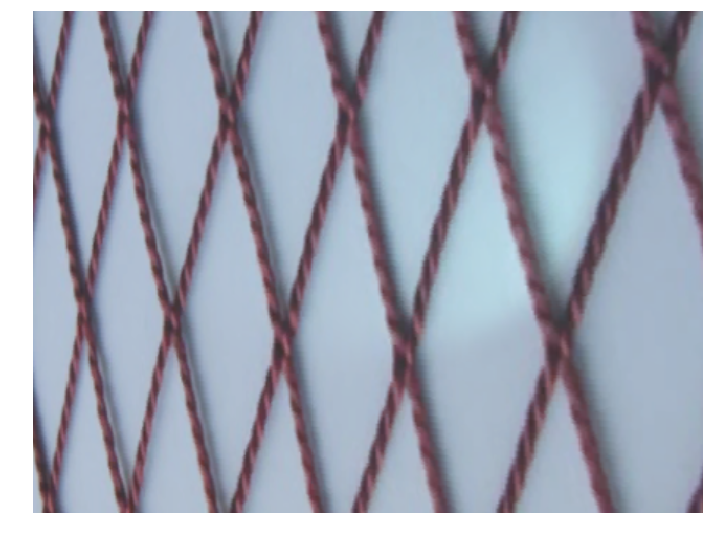

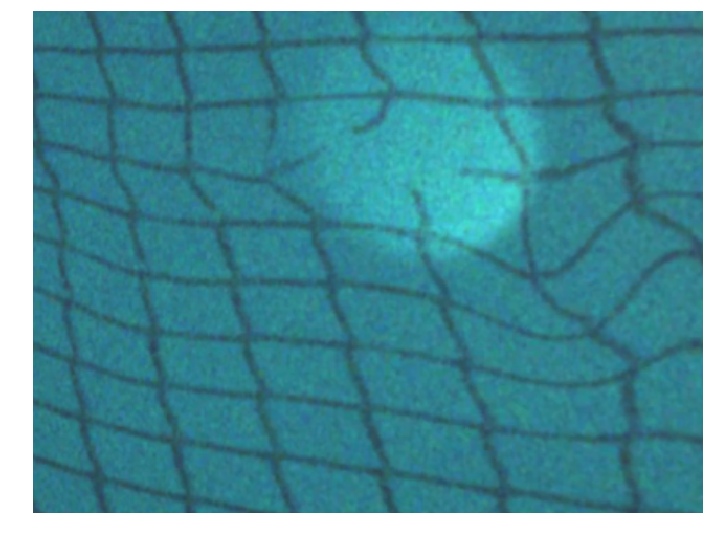

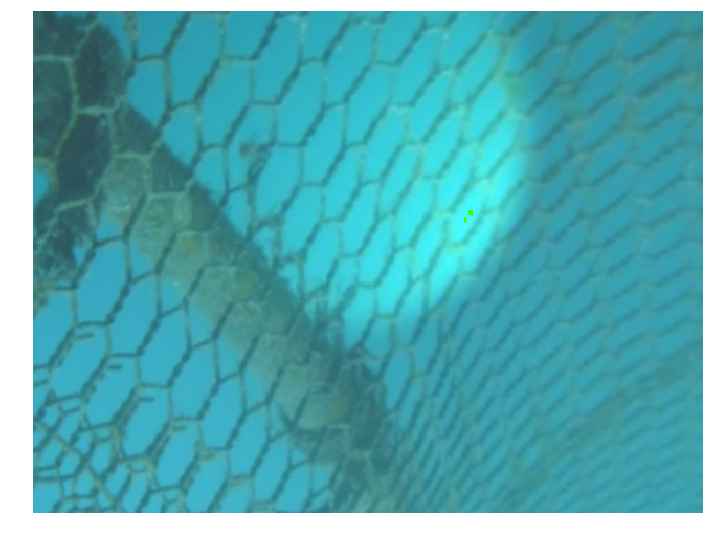

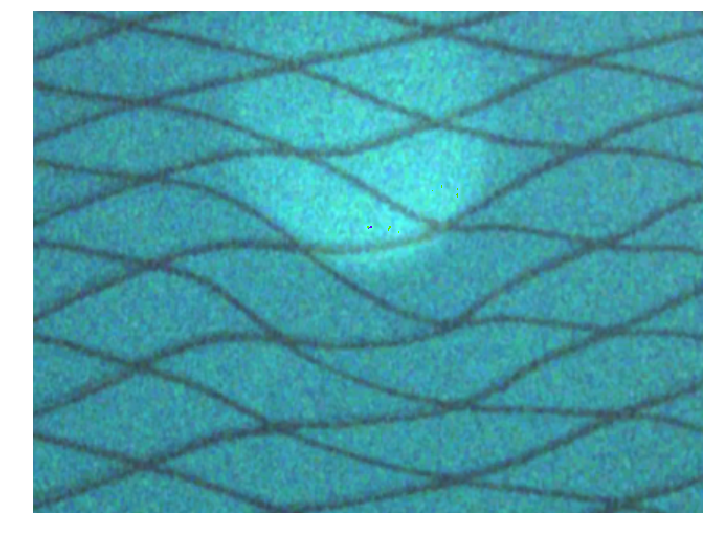

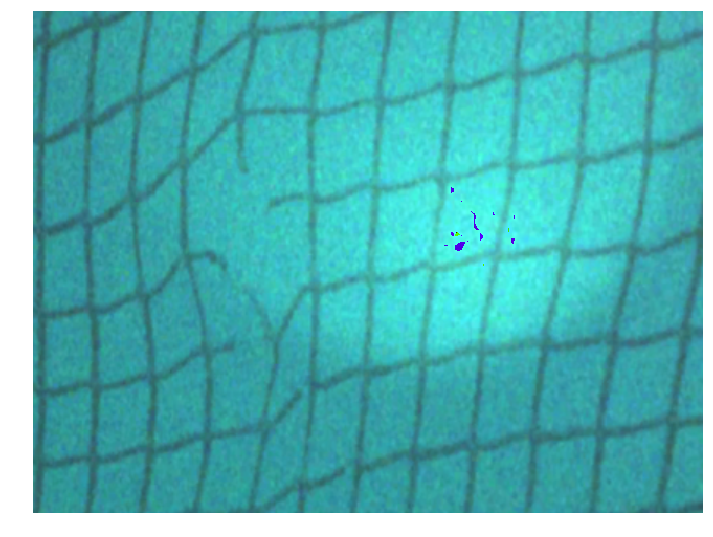

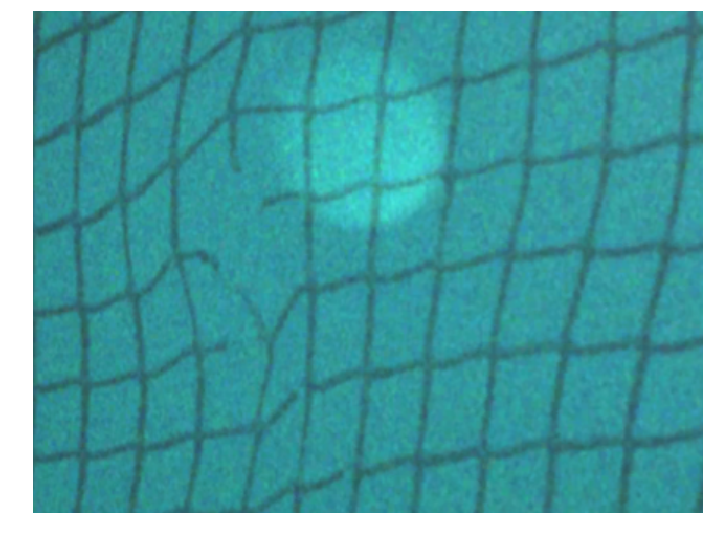

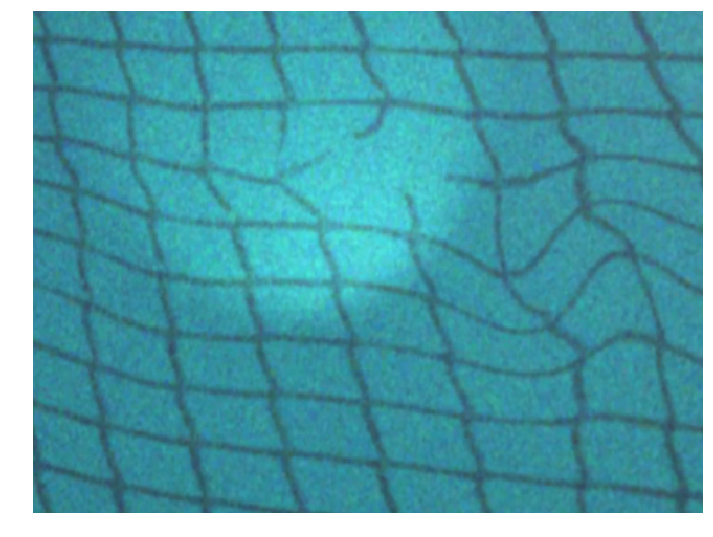

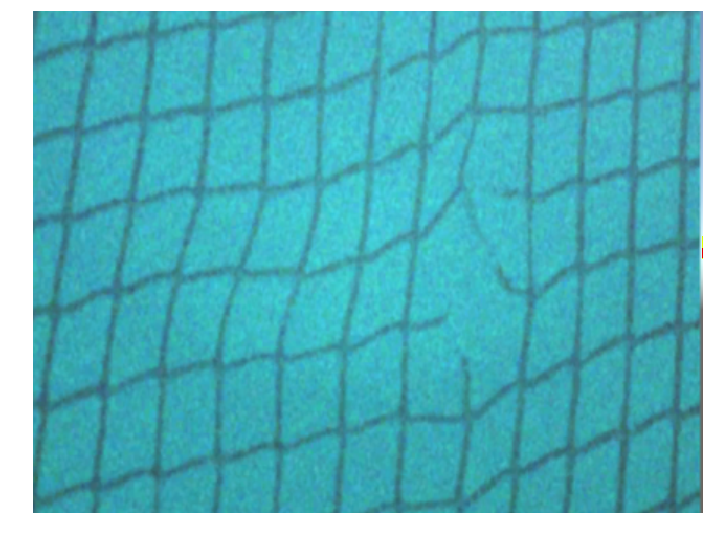

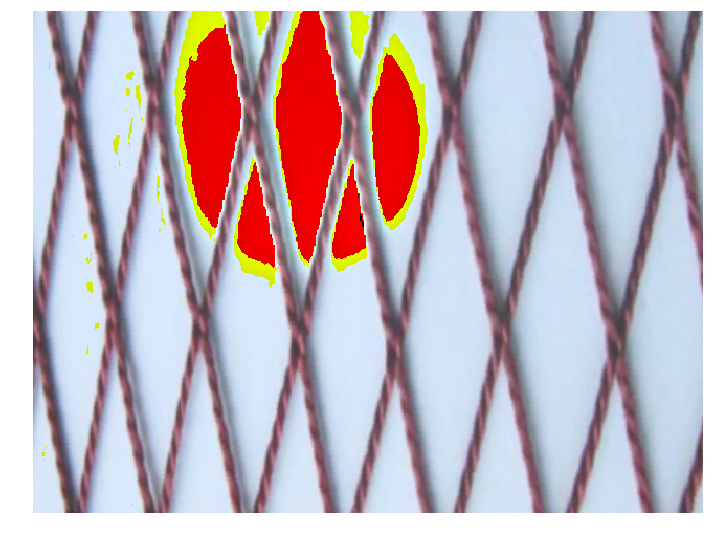

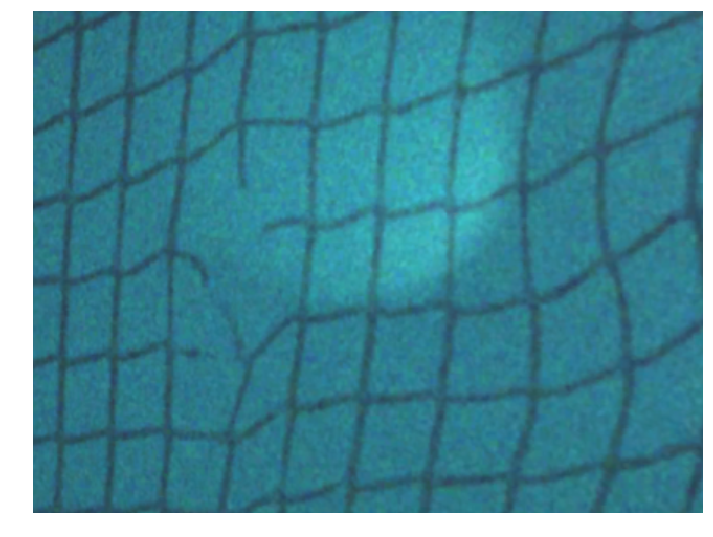

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt

for i in range(len(fail_idx[0])):

    temp_img = ev_data_sh[fail_idx[0][i]][:].reshape([480, 640, 3])

    temp_img = 255-temp_img

    width = 12
    height = 12
    plt.figure(figsize=(width, height))
    plt.axis("off")
    plt.imshow(cv2.cvtColor(temp_img, cv2.COLOR_BGR2RGB))
    plt.show()

## Results
훈련 데이터셋 2612개  
검증 데이터셋 653개  
  
정확도 87.7%  
  
CNN layer 5개  
Training step: 40000회  
Batch size: 1  


## 오현석 교수님
오교수님 데이터셋으로 훈련시킨 CNN으로 우리 데이터셋 테스트 -> 44% 정확도  
우리 데이터셋으로 훈련시킨 CNN으로 오교수님 데이터셋 테스트 -> 60% 정확도  

LeNet 사용  
이미지 크기 64 x 64